In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [2]:
data_dir = "dataset"

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train = datagen.flow_from_directory(
    data_dir,
    target_size=(128,128),
    batch_size=8,
    subset="training"
)

val = datagen.flow_from_directory(
    data_dir,
    target_size=(128,128),
    batch_size=8,
    subset="validation"
)


Found 35 images belonging to 4 classes.
Found 6 images belonging to 4 classes.


In [3]:
base = tf.keras.applications.MobileNetV2(
    input_shape=(128,128,3),
    include_top=False,
    weights="imagenet"
)

for layer in base.layers:
    layer.trainable = False

x = tf.keras.layers.GlobalAveragePooling2D()(base.output)
x = tf.keras.layers.Dense(128, activation="relu")(x)
output = tf.keras.layers.Dense(train.num_classes, activation="softmax")(x)

model = tf.keras.Model(inputs=base.input, outputs=output)

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 7s 1us/step


In [4]:
history = model.fit(train, validation_data=val, epochs=10)
model.save("hair_model.h5")

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 322ms/step - accuracy: 0.2857 - loss: 2.1372 - val_accuracy: 0.3333 - val_loss: 1.5866
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.6571 - loss: 0.8777 - val_accuracy: 0.5000 - val_loss: 1.5667
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.7714 - loss: 0.5915 - val_accuracy: 0.6667 - val_loss: 1.7621
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.9143 - loss: 0.2571 - val_accuracy: 0.5000 - val_loss: 1.4772
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9429 - loss: 0.1983 - val_accuracy: 0.5000 - val_loss: 1.2977
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9429 - loss: 0.1743 - val_accuracy: 0.6667 - val_loss: 1.3078
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 1.0000 - loss: 0.0603 - val_accuracy: 0.6667 - val_loss: 1.4429
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 1.0000 - loss: 0.0498 - val_accuracy: 0.5000 - val_loss: 1

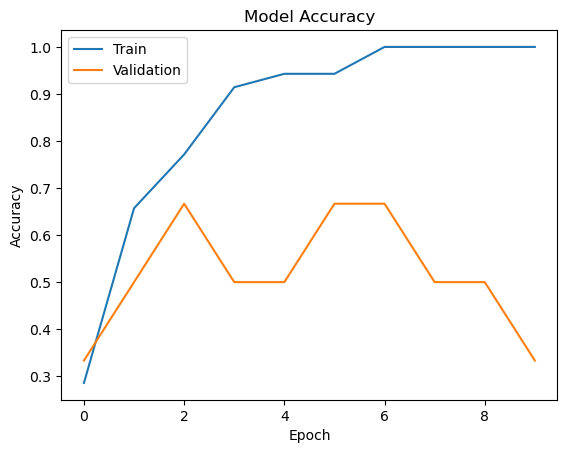

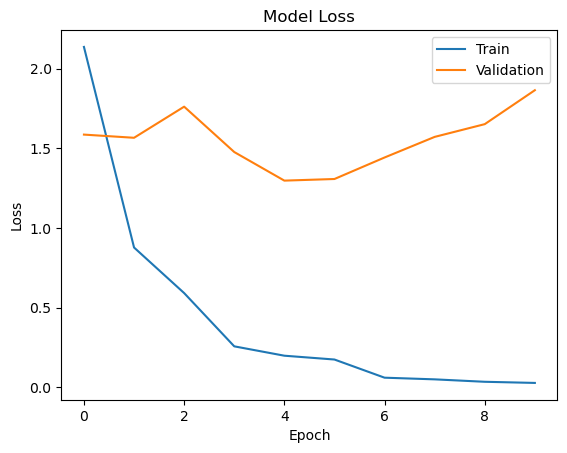

In [5]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train","Validation"])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train","Validation"])
plt.show()